In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [2]:
from sklearn.linear_model import LinearRegression
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from Modelling import modelling
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
import pandas as pd
from DataPrep.ImportData import importer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:

m = modelling(shuffle=False)

In [4]:
y_org = importer().Import()[["Start Date","Energy (kWh)","Label"]]

In [5]:
#y_org=y_org[y_org["Start Date"].dt.year==2016]
y_org.index=y_org["Start Date"]
y_org=y_org.drop(columns=["Start Date"])
#y_org=y_org[y_org["Label"]==4]
y_org=y_org.drop(columns=["Label"])
y_org

,Energy (kWh)
Start Date,
2011-07-29,1.562364
2011-07-30,1.726841
2011-07-31,2.325573
2011-08-01,1.260311
2011-08-02,2.098609
...,...
2019-12-29,2.731728
2019-12-30,3.347701
2019-12-31,3.302351


,Energy (kWh)
Start Date,
2015-01-02,3.387992
2015-01-03,3.780541
2015-01-04,8.422097
2015-01-05,2.356756
2015-01-06,3.848428
...,...
2019-12-26,4.336750
2019-12-27,4.959333
2019-12-28,6.759750


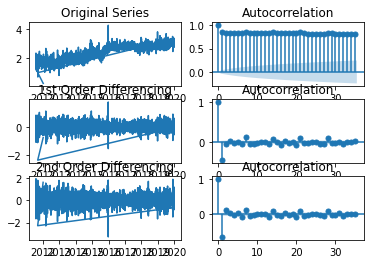

In [11]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(y_org); axes[0, 0].set_title('Original Series')
plot_acf(y_org, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_org.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_org.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_org.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_org.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Text(0.5, 1.0, 'Autocorrelation plot')

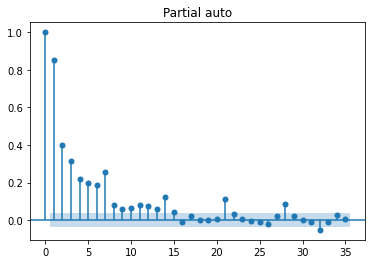

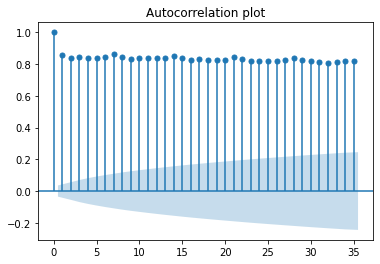

In [6]:
# Original Series

plot_pacf(y_org.dropna())
plt.title('Partial auto')
plot_acf(y_org.dropna())
plt.title("Autocorrelation plot")




In [7]:

result = adfuller(y_org.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.662480
p-value: 0.450540


In [12]:
model = pm.auto_arima(y_org.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11977.930, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11148.752, Time=1.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11975.980, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=11978.004, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=10797.982, Time=6.93 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.78 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.90 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10798.830, Time=5.36 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=10799.895, Time=8.94 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10799.936, Time=12.28 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=10798.017, Time=6.49 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=10801.980, Time=9.88 sec
 ARIMA(1,0,0)(2,1,0)[12]  

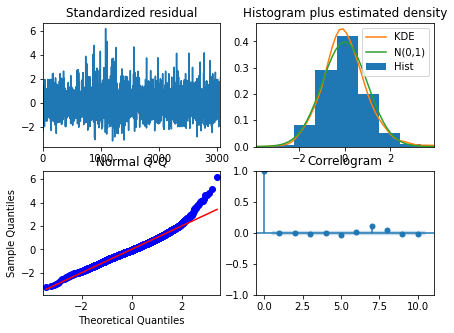

In [13]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [23]:
y_exo = importer().Import()[["Start Date","Energy (kWh)","Label"]]

In [24]:
y_exo=y_exo[y_exo["Start Date"].dt.year==2016]
y_exo.index=y_exo["Start Date"]
y_exo=y_exo.drop(columns=["Start Date"])
#y_exo=y_exo[y_exo["Label"]==0]
#y_org=y_org.drop(columns=["Label"])
y_exo

,Energy (kWh),Label
Start Date,,
2016-01-01,2.707379,0
2016-01-02,4.738530,0
2016-01-03,2.849014,0
2016-01-04,6.069899,0
2016-01-05,4.148760,0
...,...,...
2016-12-27,5.205125,7
2016-12-28,5.068947,7
2016-12-29,5.628933,7


In [25]:
# SARIMAX Model with exogenious variable 
sxmodel = pm.auto_arima(y_exo["Energy (kWh)"], exogenous=y_exo[["Label"]],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12193.282, Time=0.35 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11431.672, Time=2.66 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=11014.104, Time=3.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12191.832, Time=0.69 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=12171.008, Time=0.76 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=11016.103, Time=4.28 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=11016.103, Time=12.04 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=11439.988, Time=2.03 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=11018.085, Time=12.89 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=11114.313, Time=2.09 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=10942.637, Time=4.73 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=12169.242, Time=0.77 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=10944.480, Time=5.68 sec
 ARIMA(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2901
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood               -5451.918
Date:                              Wed, 10 Mar 2021   AIC                          10915.836
Time:                                      09:12:44   BIC                          10951.648
Sample:                                           0   HQIC                         10928.743
                                             - 2901                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Label         -0.1713      0.109     -1.572      0.116      -0.385       0.042
ma.L1          0.1915      0.014     14.142      0.000       0.165       0.218
ma.L2          0.1638      0.016     10.110      0.000       0.132       0.196
ma.L3          0.1000      0.017      5.810      0.000       0.066       0.134
ma.S.L12      -0.7696      0.010    -75.492      0.000      -0.790      -0.750
sigma2         2.5412      0.028     92.010      0.000       2.487       2.595
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             12914.88
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.35
Prob(H) (two-sided):                  0.54   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

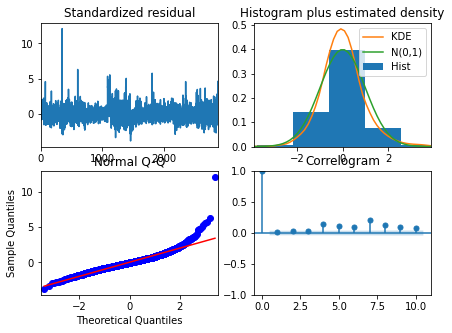

In [26]:
sxmodel.plot_diagnostics(figsize=(7,5))
plt.show()